![banner.jpg](./images/banner.jpg)

# <center>**MACHINE LEARNING : Etude du dataset manchots de l'antarctique**</center>
____________________________________________________________________________________

# <center>**I. INTRODUCTION**</center>
_____________________

Le dataset que nous avons choisis est sur les différentes espèces de machots présentes sur l'archipel Palmer. C'est un ensemble d'îles au large de la côte nord-ouest de la péninsule Antarctique.


<div style="text-align:center"><img src="./images/anvers.png" /></div>

Notre objectif est donc dans une première partie de récupérer les données et d'y faire un preprocessing. Puis dans une deuxième partie de préparer ces données pour qu'elles soient utilisés dans des algorithmes de machine learning. Pour finalement améliorer les algorithmes utilisés (tuning) et de les comparer.

Source du dataset : https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

________________________________________
## <center>**A. IMPORTATIONS (MODULES/DATASET)**</center>
________________________________________

+ **Pandas et Numpy :** manipulation et analyse des données                                                          

+ **Seaborn et pyplot :** visualisation des données
                                            
+ **Sklearn :** apprentissage automatique

+ **OS :** interface système d'exploitation

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os

**os.getcwd** permet d'avoir le chemin jusqu'au dossier du notebook et donc de manipuler plus facilement les différents fichier

In [76]:
cwd = os.getcwd()

Importation du dataset nommé **penguins_lter.csv** avec comme colonne d'index la colonne **Sample Number** du dataset correpondant à l'échantillon relevé

In [77]:
df = pd.read_csv(cwd+'/penguins_lter.csv',index_col='Sample Number')
df_sk = pd.read_csv(cwd+'/penguins_lter.csv',index_col='Sample Number')

__________
## <center>**B. FONCTIONS**</center>
__________

Fonction permettant de compter le pourcentage de NaN dans le dataset

In [78]:
def count_na_percent(df, threshold) : 
    mask = df.isna().sum() > threshold
    missing_values_count = df.isna().sum()
    return (missing_values_count[mask] / len(df) *100).sort_values(ascending=False)

Fonction qui ajoute les valeurs directement sur les graphiques barres horizontaux de seaborn

In [79]:
def show_values(axs,space=.01):
    def _single(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.5f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")
    _single(axs)

Fonction de normalisation des données

___
## <center>**C. PRÉSENTATION DES DONNÉES**</center>
___

**Information sur les données présentes dans le dataset :**

<table>
<tr>
<td>

|        **Champ**        | **Description**                                                                                                    |
|:-----------------------:|--------------------------------------------------------------------------------------------------------------------|
|        **Sample**       | *Un nombre entier indiquant la séquence de numérotation continue pour chaque échantillon*                          |
|      **studyName**      | *Expédition d'échantillonnage à partir de laquelle les données ont été collectées, générées, etc.*                 |
|       **Species**       | *Une chaîne de caractères désignant l'espèce du manchot*                                                           |
|        **Region**       | *Une chaîne de caractères indiquant la région de la grille d'échantillonnage Palmer LTER*                          |
|        **Island**       | *Une chaîne de caractères désignant l'île près de la station Palmer où les échantillons ont été prélevés*          |
|        **Stage**        | *Une chaîne de caractères indiquant le stade de reproduction au moment de l'échantillonnage*                       |
|    **Individual ID**    | *Une chaîne de caractères indiquant l'identifiant unique de chaque individu dans l'ensemble de données*            |
|  **Clutch Completion**  | *Une chaîne de caractères indiquant si le nid d'étude observé avec une couvée complète, c'est-à-dire 2 œufs*       |
|       **Date Egg**      | *Une date indiquant la date à laquelle le nid de l'étude a été observé avec 1 œuf (échantillonné)*                 |
|  **Culmen Length (mm)** | *Un nombre indiquant la longueur de la crête dorsale du bec du manchot (millimètres)*                              |
|  **Culmen Depth (mm)**  | *Un nombre indiquant la profondeur de la crête dorsale du bec du manchot (millimètres)*                            |
| **Flipper Length (mm)** | *Un entier indiquant la longueur de la nageoire du manchot (millimètres)*                                          |
|    **Body Mass (g)**    | *Un nombre entier indiquant la masse corporelle du manchot (grammes)*                                              |
|         **Sex**         | *Une chaîne de caractères indiquant le sexe du manchot*                                                            |
|  **Delta 15 N (o/oo)**  | *Un nombre indiquant la mesure du rapport des isotopes stables 15N:14N*                                            |
|  **Delta 13 C (o/oo)**  | *Un nombre indiquant la mesure du rapport des isotopes stables 13C:12C*                                            |
|       **Comments**      | *Une chaîne de caractères avec du texte fournissant des informations supplémentaires pertinentes pour les données* |

</td>
<td>

![penguin.png](./images/penguin.png)

</td>
</tr>
</table>

___
# <center>**II. ANALYSE MANUEL**</center>
___

Nous allons réaliser dans cette partie une analyse du dataset à la main (pre-processing, visualisation, mise en place des algorithmes, optimisation et comparaison)

___
## <center>**A. PRE-PROCESSING DES DONNÉES**</center>
___

Le Pre-processing est une méthode de pré-traitement des données pour optimiser les algorithmes de machine learning.

Pour cela, nous allons suivre l'acheminement de pensée suivant.

|    **Méthode**    | **Description**                                                                                        |
|:-----------------:|--------------------------------------------------------------------------------------------------------|
|    **Encodage**   | *Convertir les données qualitatives en valeurs numériques quantitatives*                               |
| **Normalisation** | *Mettre sous la même échelle toutes les valeurs numériques quantitatives (généralement entre -1 et 1)* |
|   **Imputation**  | *Remplacer/Supprimer les données manquantes*                                                           |
|   **Sélection**   | *Grâce à des tests statistiques, sélection les variables les plus utiles au modèle*                    |
|   **Extraction**  | *Générer de nouvelles variables pour le dataset*                                                       |

In [80]:
df.head(1)

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.


____
### <center>**i. ENCODAGE**</center>
____

On encode dans l'ordre, les colonnes suivantes : Island, Species, Clutch Completion et Sex

In [81]:
df = df.drop(["Individual ID","Date Egg","Comments","Region","Stage"], axis=1)

df['studyName'] = df['studyName'].replace(['PAL0910','PAL0809','PAL0708'],[0,1,2])

df['Island'] = df['Island'].replace(['Torgersen', 'Biscoe', 'Dream'],[0,1,2])

df['Clutch Completion'] = df['Clutch Completion'].replace(['Yes', 'No'],[1,0])

df["Sex"] = df["Sex"].replace(np.nan, 'None Specified')
df["Sex"] = df["Sex"].replace('.', 'None Specified')
df = df.replace(['MALE', 'FEMALE', 'None Specified'],[0,1,2])

____
### <center>**ii. NORMALISATION**</center>
____

In [82]:
y = df['Species']
X = df.drop('Species', 1)

X.iloc[:,0:-1] = X.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df['Species'] = y

df.head()

,studyName,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,,,,,,,,,,,
1,2,Adelie Penguin (Pygoscelis adeliae),0,1,39.1,18.7,181.0,3750.0,0,NaN,NaN
2,2,Adelie Penguin (Pygoscelis adeliae),0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
3,2,Adelie Penguin (Pygoscelis adeliae),0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,2,Adelie Penguin (Pygoscelis adeliae),0,1,NaN,NaN,NaN,NaN,2,NaN,NaN
5,2,Adelie Penguin (Pygoscelis adeliae),0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426


____
### <center>**iii. IMPUTATIONS**</center>
____

On récupère les dimensions de notre dataframe pour l'analyse

In [83]:
nrows = df.shape[0]
ncols = df.shape[1]
ncols,nrows

(11, 344)

Pour connaitre le pourcentage de NaN selon le nombre de cellules du DataFrame on execute le code ci dessous (on obtient 1,15%)

In [84]:
nb_cells = np.product(df.shape)
nb_na = df.isna().sum().sum()
nb_na / nb_cells * 100

0.9249471458773785

In [85]:
count_na_percent(df, 0)

Delta 15 N (o/oo)      4.069767
Delta 13 C (o/oo)      3.779070
Body Mass (g)          0.581395
Flipper Length (mm)    0.581395
Culmen Depth (mm)      0.581395
Culmen Length (mm)     0.581395
dtype: float64

In [86]:
df = df.dropna()

____
### <center>**iv. SÉLECTION**</center>
____

<center>...</center>

____
### <center>**v. EXTRACTION (AJOUT DE FEATURES)**</center>
____

**Ici nous ajoutons 4 features afin d'ameliorer en amont les résultats de nos algorithmes de machine learning**

|         **Champ**         | **Description**                                                                                                                 |
|:-------------------------:|---------------------------------------------------------------------------------------------------------------------------------|
| **Culment Surface (mm2)** | *Un nombre indiquant la surface de la crête dorsale du bec du manchot (en millimètre carré)*                                    |
|   **Total Lenght (mm)**   | *Un nombre indiquant longueur plus la profondeur de la crête dorsale plus la longueur de la nageoire du manchot (en millimètre)* |
|    **Delta Tot (o/oo)**   | *Un nombre indiquant la somme rapport des isotopes stables 15N:14N et rapport des isotopes stables 13C:12C*                     |
| **Massic Volume (g/mm3)** | *Un nombre indiquant la masse volumique d'un manchot (en gramme par millimètre cube)*                                           |

In [87]:
df["Culmen Surface (mm2)"] = df["Culmen Length (mm)"] * df["Culmen Depth (mm)"]
df["Total Lenght (mm)"] = df["Culmen Length (mm)"] + df["Culmen Depth (mm)"] + df["Flipper Length (mm)"]
df["Delta Tot (o/oo)"] = df["Delta 15 N (o/oo)"] + df["Delta 13 C (o/oo)"]
df["Massic Volume (g/mm3)"] = df["Body Mass (g)"] / (df["Culmen Length (mm)"] * df["Culmen Depth (mm)"] * df["Flipper Length (mm)"])

df['Species'] = df['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)',
                                        'Chinstrap penguin (Pygoscelis antarctica)',
                                        'Gentoo penguin (Pygoscelis papua)'],
                                        [0,1,2])

____
### <center>**vi. RÉSULTAT**</center>
____

In [88]:
df.head()

,studyName,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Surface (mm2),Total Lenght (mm),Delta Tot (o/oo),Massic Volume (g/mm3)
Sample Number,,,,,,,,,,,,,,,
2,2,0,0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454,687.30,242.9,-15.74498,0.029725
3,2,0,0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302,725.40,253.3,-16.96481,0.022976
5,2,0,0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426,708.31,249.0,-16.55775,0.025237
6,2,0,0,1,39.3,20.6,190.0,3650.0,0,8.66496,-25.29805,809.58,249.9,-16.63309,0.023729
7,2,0,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799,692.42,237.7,-16.03081,0.028924


___
## <center>**B. GRAPHIQUES**</center>
___

On trace quelques graphiques afin de nous rendre compte des données et des repartitions

____
### <center>**i. DISPERTION DES DONNÉES EN FONCTION DE L'ESPÈCE**</center>
____

/Users/charles/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


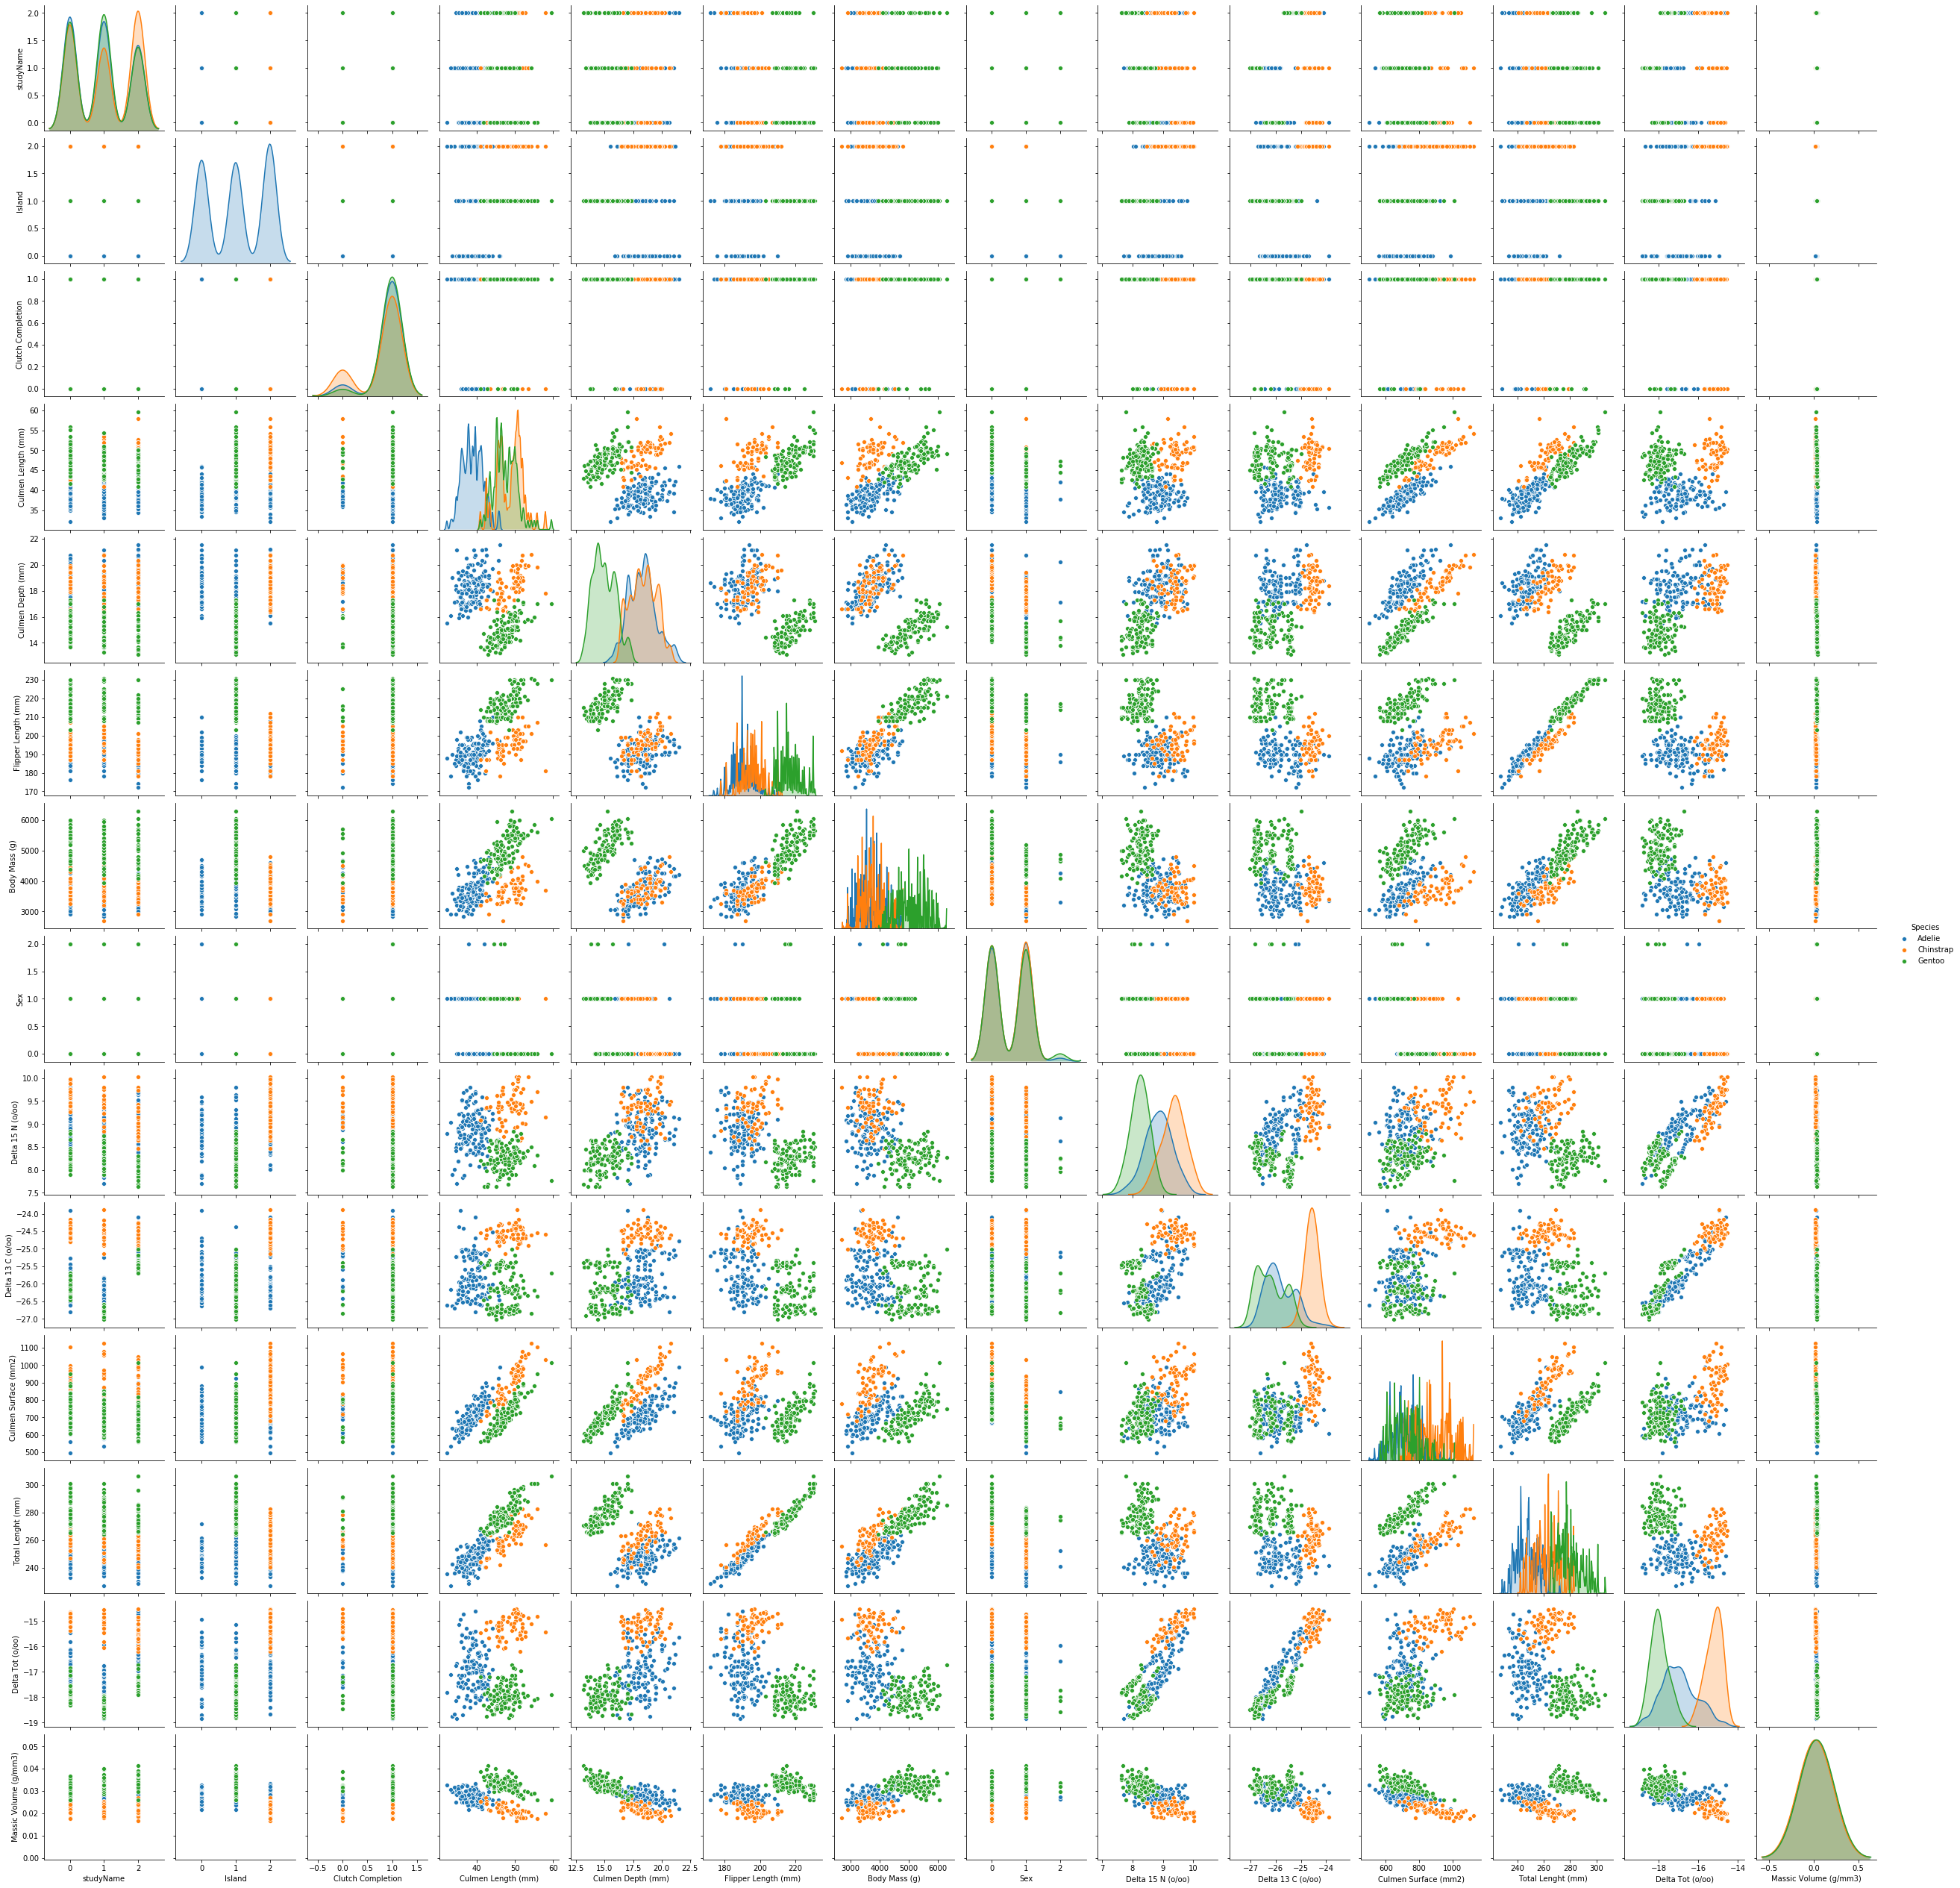

In [89]:
df_plot = df
df_plot['Species'] = df['Species'].replace([0,1,2],['Adelie','Chinstrap','Gentoo'])
sns.pairplot(df_plot, hue='Species',diag_kws={'bw': 0.2})

____
### <center>**ii. CARTE DE CHALEUR (CORRÉLATIONS)**</center>
____

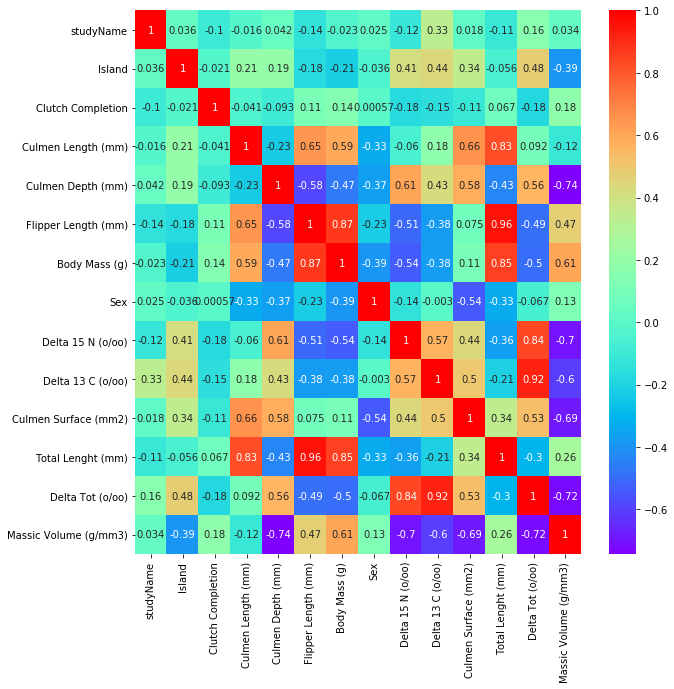

In [90]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")

___
## <center>**C. MACHINE LEARNING**</center>
___

La Target étant **l'espèce** (y) et les Features étant toutes les **autres données** (X)

In [91]:
X = df.drop('Species', 1)
y = df['Species'].replace(['Adelie','Chinstrap','Gentoo'],[0,1,2])

Répartition de **Train set** et **Test set** - En général 0.2 < test_size < 0.4

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Variables pour stocker les différentes méthodes utilisées (LR,KNN ...) et leur score de performance

In [93]:
method = []
scores = []

___
## <center>Linear Regression</center>
___

L'algorithme de régression linéaire est un algorithme d'apprentissage supervisé c'est-à-dire qu'à partir de la variable cible ou de la variable à expliquer (Y), le modèle a pour but de faire une prédiction grâce à des variables dites explicatives (X) ou prédictives.

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

method.append('Linear regresion')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Linear regresion test Score : 0.92573


___
## <center>KNN</center>
___

L’algorithme des K plus proches voisins ou K-nearest neighbors (kNN) est un algorithme de Machine Learning qui appartient à la classe des algorithmes d’apprentissage supervisé simple et facile à mettre en œuvre qui peut être utilisé pour résoudre les problèmes de classification et de régression

In [95]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(random_state = 42)

model.fit(X_train,y_train)

method.append('KNN')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

KNN test Score : 0.86364


___
## <center>Decision Tree</center>
___

L'apprentissage par arbre de décision est une méthode classique en apprentissage automatique. Son but est de créer un modèle qui prédit la valeur d'une variable-cible depuis la valeur de plusieurs variables d'entrée.

Decision Tree test Score : 0.93939


[Text(1029.642857142857, 1087.2, 'Flipper Length (mm) <= 206.0\ngini = 0.642\nsamples = 264\nvalue = [112, 55, 97]'),
 Text(597.8571428571429, 845.6, 'Delta 13 C (o/oo) <= -24.959\ngini = 0.435\nsamples = 162\nvalue = [111, 50, 1]'),
 Text(265.7142857142857, 604.0, 'Culmen Length (mm) <= 47.1\ngini = 0.019\nsamples = 105\nvalue = [104, 0, 1]'),
 Text(132.85714285714286, 362.4, 'gini = 0.0\nsamples = 104\nvalue = [104, 0, 0]'),
 Text(398.57142857142856, 362.4, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(930.0, 604.0, 'Massic Volume (g/mm3) <= 0.026\ngini = 0.215\nsamples = 57\nvalue = [7, 50, 0]'),
 Text(664.2857142857143, 362.4, 'Island <= 1.0\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(531.4285714285714, 120.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(797.1428571428571, 120.79999999999995, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(1195.7142857142858, 362.4, 'Flipper Length (mm) <= 181.5\ngini = 0.245\nsamples = 7\nvalue = [6,

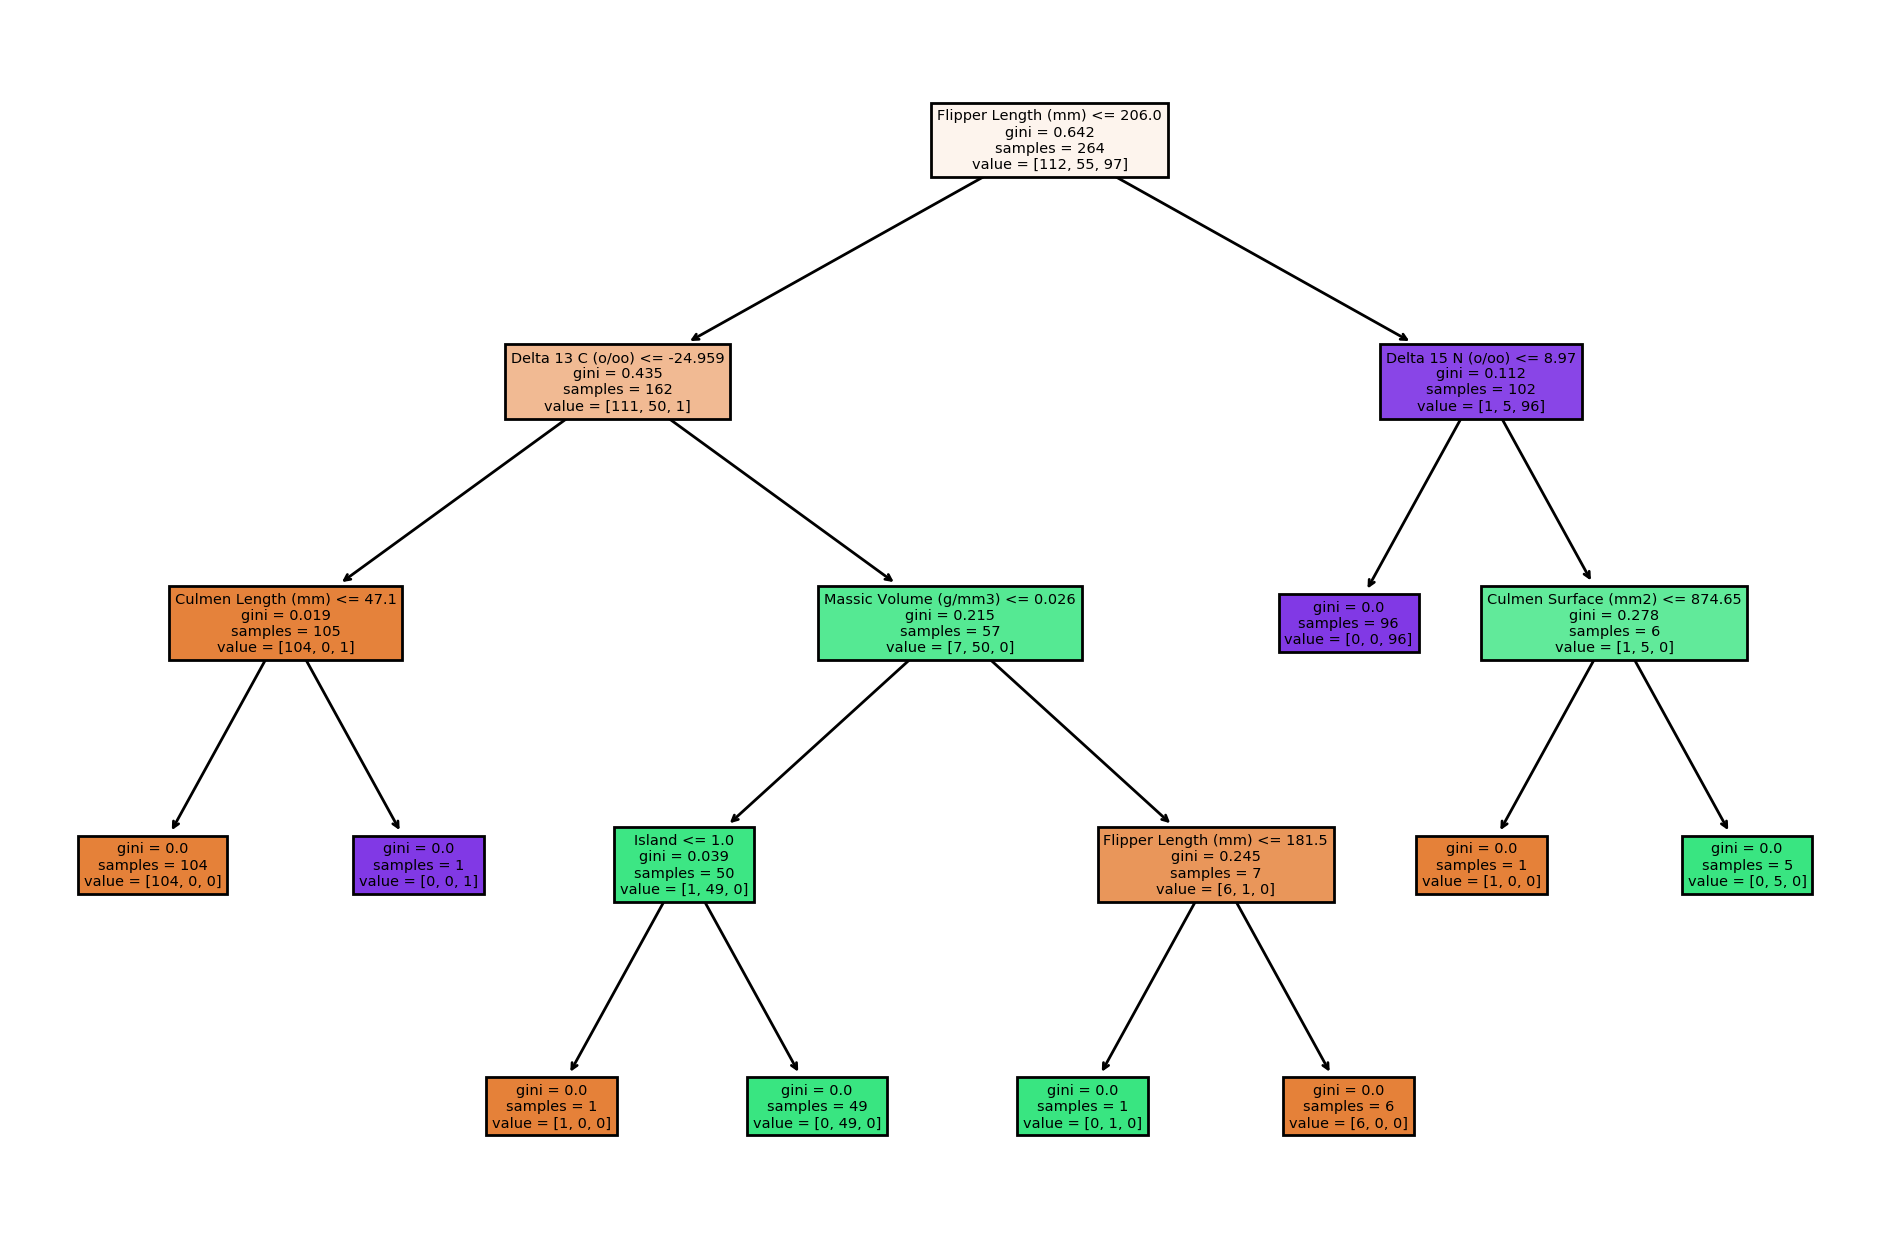

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train,y_train)
method.append('Decision Tree')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True)

___
## <center>Random Forest</center>
___

Le random forest ou forêt aléatoire est un algorithme sophistiqué, dans le domaine du machine learning. Il permet d'obtenir une prédiction fiable, grâce à son système de forêt d'arbres décisionnels.

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)
method.append('Random Forest')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Random Forest test Score : 0.98485


___
## <center>SVC</center>
___

Le SVM est une solution à ce problème de classification1. Le SVM appartient à la catégorie des classificateurs linéaires (qui utilisent une séparation linéaire des données), et qui dispose de sa méthode à lui pour trouver la frontière entre les catégories.

In [98]:
from sklearn.svm import SVC

model = SVC(random_state = 42)
model.fit(X_train,y_train)
method.append('SVC')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

SVC test Score : 0.75758


___
## <center>Neural Network</center>
___

Ces réseaux de neurones sont appelés des réseaux neuronaux convolutifs (Convolutional Neural Networks). Ces réseaux peuvent être imaginés comme une compilation d'un segment d'informations pour au final traiter l'ensemble de l'information (par exemple le traitement d'image, de vidéos, de textes).

In [99]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state = 42)
model.fit(X_train,y_train)
method.append('Neural Network')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Neural Network test Score : 0.84848


___
## <center>**D. RÉCAPITULATIF PERFORMANCE**</center>
___

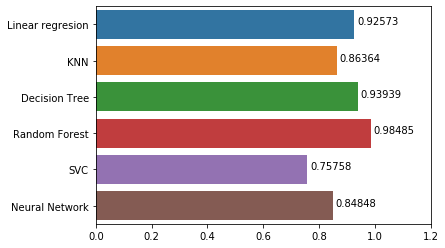

In [100]:
g = sns.barplot(x=scores,y=method)
g.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
show_values(g)


___
## <center>**E. TUNING MACHINE LEARNING**</center>
___

Réglage des hyperparamètre afin d'obtenir le meilleur score pour chaque algorithme

___
## <center>Linear Regression</center>
___

<center>Aucune possibilité de tuning pour une regression linéaire sur Sklearn</center>

___
## <center>KNN</center>
___

### <center>**Méthode boucle**</center>

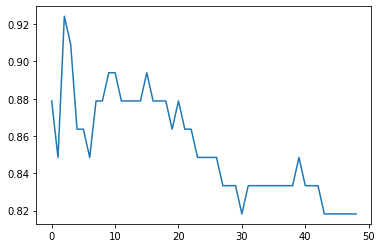

In [101]:
val_score = []
for voisins in range(1,50):
    model = KNeighborsClassifier(n_neighbors=voisins)
    model.fit(X_train,y_train)
    val_score.append(model.score(X_test,y_test))

plt.plot(val_score)

### <center>**Cross validation**</center>

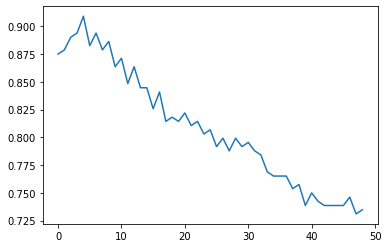

In [102]:
from sklearn.model_selection import cross_val_score

val_score = []
for voisins in range(1,50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=voisins),X_train,y_train,cv=3,scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

### <center>**Courbe de validation**</center>

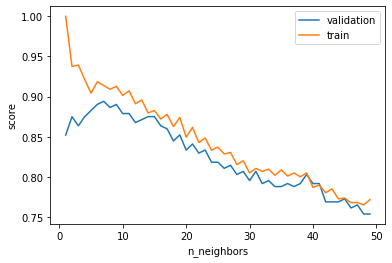

In [103]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5)

plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### <center>**Grille de recherche**</center>

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

param_grid = {'n_neighbors':np.arange(1,50),
              'metric': ['euclidean','manhattan']}
              
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(X_train,y_train)

model = grid.best_estimator_

print('Score :',model.score(X_test,y_test))

Score : 0.9242424242424242


### <center>**Matrice de confusion**</center>

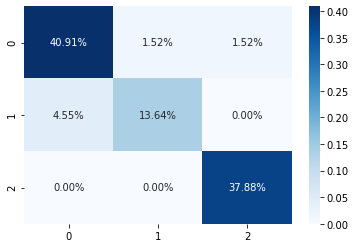

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,model.predict(X_test))

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### <center>**Courbe d'apprentissage**</center>

[ 10  21  31  42  52  63  73  84  94 105 116 126 137 147 158 168 179 189
 200 211]


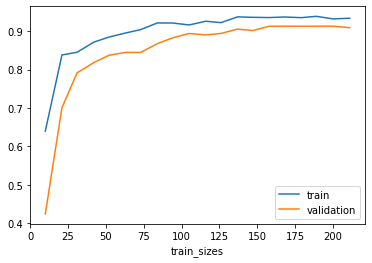

In [ ]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train,y_train, train_sizes = np.linspace(0.05,1.0,20),cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

___
# <center>**III. ANALYSE FULL SKLEARN**</center>
___

In [ ]:
df_sk.head(1)

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.


In [127]:
# Pre-processing and pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modèle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Pre-Processing
y = df_sk['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)',
                                        'Chinstrap penguin (Pygoscelis antarctica)',
                                        'Gentoo penguin (Pygoscelis papua)'],
                                        [0,1,2])
X = df_sk.drop(['Species','studyName','Individual ID','Date Egg','Comments'],axis=1)
X["Sex"] = X["Sex"].replace([np.nan,'.'], 'None Specified')

# Découpage du dataset Train / Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Séparation des variables numériques et catégoriques
numerical_feature = make_column_selector(dtype_include=np.number)
categorical_feature = make_column_selector(dtype_exclude=np.number)

# Initialisation du pre-processing associé à chaque type de variable
numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy= 'most_frequent'),OneHotEncoder())

# Transformation des colonnes en fonction de la stratégie adoptée
preprocessor = make_column_transformer((numerical_pipeline,numerical_feature),(categorical_pipeline,categorical_feature))

# Définition des méthodes et du tuning des hyperparamètres
methods = [
    [
        LinearRegression(),
        {},
        'Linear Regression'
    ],
    [
        KNeighborsClassifier(),
        {
            'alg__n_neighbors':np.arange(1,50),
            'alg__metric': ['euclidean','manhattan']
        },
        'KNN'
    ],
    [
        DecisionTreeClassifier(random_state = 42), 
        {
            "alg__criterion":["gini","entropy"],
            "alg__splitter":["best","random"],
            "alg__max_depth" : [1,3,5,7,10],
            "alg__min_samples_leaf":[1,2,3,4,5],
        },
        'Decision Tree'
    ],
    [
        RandomForestClassifier(random_state = 42),
        {
            "alg__max_depth" : [1,3,5,7,10],
            'alg__min_samples_leaf': [1,2,3,4,5]
        },
        'Random Forest',   
    ],
    [
        SVC(random_state = 42),
        {
            'alg__C': [0.1,1, 10, 100],
            'alg__gamma': [1,0.1,0.01,0.001],
            'alg__kernel': ['rbf', 'poly', 'sigmoid']
        },
        'SVC'
    ],
    [
        MLPClassifier(random_state = 42),
        {
            'alg__hidden_layer_sizes': [(10,30,10),(20,)],
            'alg__activation': ['tanh', 'relu'],
            'alg__solver': ['sgd', 'adam'],
            'alg__alpha': [0.0001, 0.05],
            'alg__learning_rate': ['constant','adaptive'],
            'alg__max_iter': [3000]
        },
        'Neural Network'
    ]
]
method, score_best, score_test = [],[],[]

# Recherche des meilleurs paramètres pour l'optimisation des algorithmes
for met in methods:
    model = Pipeline([
        ('pre',preprocessor),
        ('alg',met[0])
        ])
    grid = GridSearchCV(model,met[1],cv=5)
    grid.fit(X_train,y_train)
    print(met[2],'-\n    > Best score :',grid.best_score_,'\n    > Best params :',grid.best_params_,'\n    > Test score :',grid.score(X_test, y_test))
    method.append(met[2])
    score_best.append(grid.best_score_)
    score_test.append(grid.score(X_test, y_test))

Linear Regression -
    > Best score : 0.924069480981545 
    > Best params : {} 
    > Test score : 0.8938824006349428
KNN -
    > Best score : 0.9963636363636365 
    > Best params : {'alg__metric': 'euclidean', 'alg__n_neighbors': 3} 
    > Test score : 1.0
Decision Tree -
    > Best score : 0.9709090909090909 
    > Best params : {'alg__criterion': 'entropy', 'alg__max_depth': 5, 'alg__min_samples_leaf': 1, 'alg__splitter': 'random'} 
    > Test score : 0.9565217391304348
Random Forest -
    > Best score : 0.9745454545454546 
    > Best params : {'alg__max_depth': 5, 'alg__min_samples_leaf': 2} 
    > Test score : 1.0
SVC -
    > Best score : 0.9963636363636365 
    > Best params : {'alg__C': 100, 'alg__gamma': 0.001, 'alg__kernel': 'rbf'} 
    > Test score : 1.0
Neural Network -
    > Best score : 0.9963636363636365 
    > Best params : {'alg__activation': 'tanh', 'alg__alpha': 0.0001, 'alg__hidden_layer_sizes': (10, 30, 10), 'alg__learning_rate': 'constant', 'alg__max_iter': 3000

___
### <center>**Best scores**</center>
___

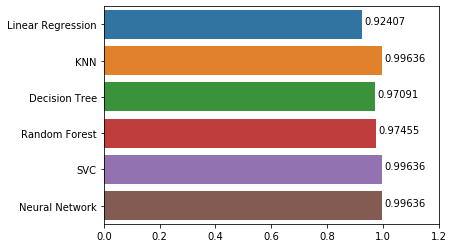

In [128]:
g = sns.barplot(x=score_best,y=method)
g.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
show_values(g)

___
### <center>**Test scores**</center>
___

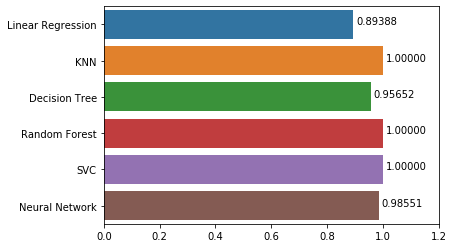

In [129]:
g = sns.barplot(x=score_test,y=method)
g.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
show_values(g)

___
# <center>**IV. CONCLUSION**</center>
___

![conclusion.jpg](./images/banner_alt.jpg)

> Ce projet, nous a permis d'explorer plusieurs algorithmes de machine learning et de les comparés. 

> En outre cela, nous a permis d'en apprendre plus sur ce sujet, de développer nos compétences de programmation dans le langage python

> Réaliser un projet en groupe en utilisant des outils de gestion de projet (Git)

> D'étudier sur un domaine nouveau (Biologie avec le dataset sur les manchots)

> Nous avons également appris à optimiser (réaliser un tuning) sur les différents algorithmes mis en place en changeant les paramètres.

Point à approfondir : 

> Ajout d'autres algorithmes (Kmeans ...)

> Ajout de nouveaux paramètre dans la pipeline (Normalisation, exclusion des extrèmes ...)

> Calcul des metrics

> Optimisation du split échantillon